In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
from google.colab import drive
from scipy.stats import beta
from scipy.optimize import minimize

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:

def parse_filelist( filelist_path, split_char="|"):
  with open(filelist_path, encoding='utf-8') as f:
      filepaths_and_text = [line.strip().split(split_char) for line in f]
  return filepaths_and_text

def plot_graph_dist (train_data_syn) :
  y=[]
  for item in train_data_syn:
    y.append(item[2])
  t = np.arange(0, np.size(y), 1)
  plt.plot(t, y, 'r--')
  plt.hist(y, bins=30, color='skyblue', edgecolor='black')
  plt.show()


def plot_graph_hist (train_data_syn) :
  y=[]
  for item in train_data_syn:
    y.append(item[2])
  plt.hist(y, bins=30, weights=np.ones(len(y)) / len(y), color='skyblue', edgecolor='black')
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.show()

path = '/content/gdrive/MyDrive/temp/'
train_data_org = parse_filelist ( path + 'filter_maori_org_data-1.txt')
train_data_syn1 = parse_filelist ( path + 'filter_maori_syn_data-2.txt')
train_data_syn2 = parse_filelist ( path + 'filter_maori_syn_data-3.txt')
train_data_syn3 = parse_filelist ( path + 'filter_maori_syn_data-4.txt')
train_data_syn4 = parse_filelist ( path + 'filter_maori_syn_data-eng-1.txt')

In [ ]:
org = []
for d in train_data_org:
  if float(d[4]) < 100 :
    org.append ([ d[0], d[2] , float(d[4]) ] )

org.sort(key=lambda x: x[2])

syn = []
for d in train_data_syn1:
  #if float(d[4]) < 100 and float(d[4]) > 5:
  syn.append ([ d[0], d[2] , float(d[4]) ] )
for d in train_data_syn2:
  #if float(d[4]) < 100 and float(d[4]) > 5 :
  syn.append ([ d[0], d[2] , float(d[4]) ] )
for d in train_data_syn3:
  #if float(d[4]) < 100 and float(d[4]) > 5 :
  syn.append ([ d[0], d[2] , float(d[4]) ] )
for d in train_data_syn4:
  #if float(d[4]) < 100 and float(d[4]) > 5 :
  syn.append ([ d[0], d[2] , float(d[4]) ] )
#syn.sort(key=lambda x: x[2])

y_org=[]
y_syn=[]
y_syn_=[]

for item in org:
  y_org.append(item[2]/100)
for item in syn:
  if float(item[2]) < 100 and float(item[2]) > 5 :
    y_syn.append(item[2]/100)
for item in syn:
  if float(item[2]) < 100:
    y_syn_.append(item[2]/100)

# Step 1: Original dataset (e.g., uniform distribution)
np.random.seed(42)
data = syn
#file = open(path + 'rejectingsampling_first.txt', 'w')
# Step 2: Define the target prior (e.g., Gaussian distribution)
alpha, beta_param = 0.64, 4.21
prior = beta(a=alpha, b=beta_param)

print(len(y_syn))
print(len(data))
# Step 3: Compute the maximum density of the prior for normalization
M = max(prior.pdf(y_syn))  # Maximum value of the prior's PDF over the dataset
print(M)
# Step 4: Perform rejection sampling
accepted_samples = []
for x in syn:
    u = np.random.uniform(0, 1)
    if u <= prior.pdf(float(x[2])/100) / M:
      accepted_samples.append(x[2]/100)
      #print(x[0] + '|' + x[1] + '\n')
      #file.write(x[0] + '|' + x[1] + '\n')

print(len(accepted_samples))




299879
307500
4.329099710161046
126866


<ipython-input-4-951eebf42a66>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(labels)
<ipython-input-4-951eebf42a66>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(labels)


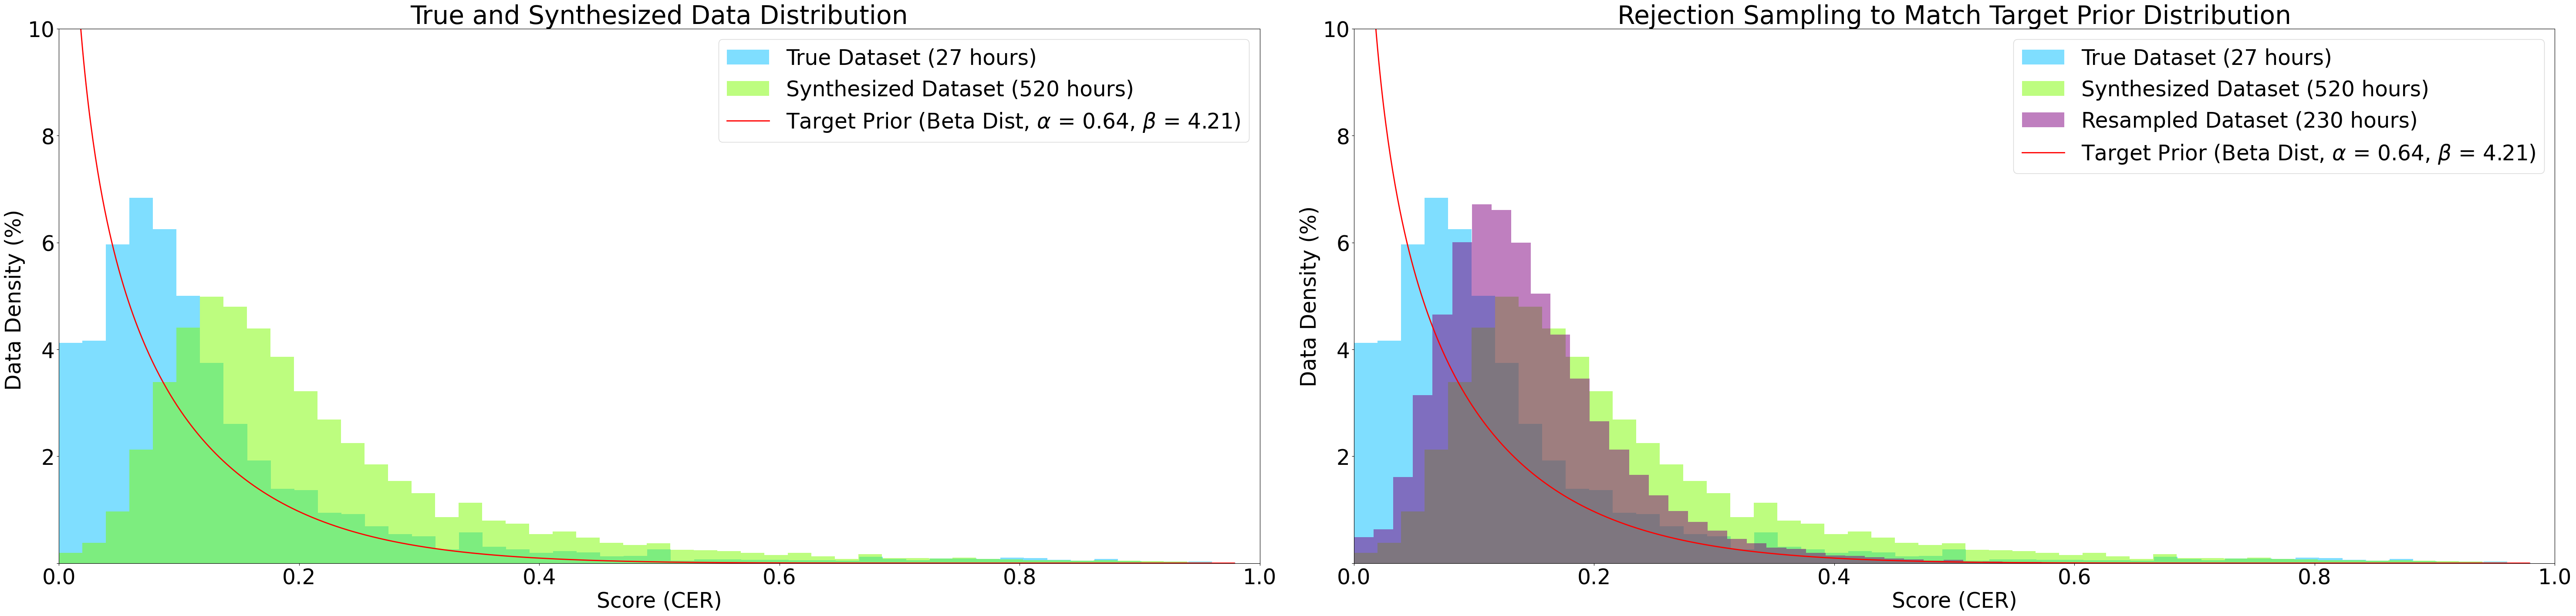

In [ ]:
plt.rcParams["figure.figsize"]=60,15
plt.rcParams.update({'font.size': 35})

alpha, beta_param = 0.64, 8.21
prior = beta(a=alpha, b=beta_param)

fig, ax = plt.subplots(1,2)
x = np.linspace(min(y_syn)/10, max(y_syn), 1000)
#ax[0].hist([y_org,y_syn], bins=30, density=True, alpha=0.5, label=["True Dataset","Synthesized Dataset"], color=["skyblue","green"])
ax[0].hist([y_org], bins=50, density=True, alpha=0.5, label=["True Dataset (27 hours)"], color=["deepskyblue"])
ax[0].hist([y_syn_], bins=50, density=True, alpha=0.5, label=["Synthesized Dataset (520 hours)"], color=["lawngreen"])

#ax[0].hist(y_org, weights=np.ones(len(y_org)) / len(y_org))
#ax[0].hist(y_syn_, weights=np.ones(len(y_syn_)) / len(y_syn_))

ax[0].plot(x, prior.pdf(x), label=r'Target Prior (Beta Dist, $\alpha$ = 0.64, $\beta$ = 4.21)', color="red", lw=2)
ax[0].set_ylim([0, 10])
ax[0].set_xlim([0, 1])
ax[0].set_title('True and Synthesized Data Distribution')
ax[0].set_ylabel('Data Density (%) ')
ax[0].set_xlabel('Score (CER)')

labels = ['',2,4,6,8,10]
ax[0].set_yticklabels(labels)

ax[0].legend(fontsize=35)
#ax[1].hist([y_org,y_syn,accepted_samples], bins=30, density=True, alpha=0.5, label=["True Dataset","Synthesized Dataset","Resampled Dataset"], color=["skyblue","green","purple"])
ax[1].hist([y_org], bins=50, density=True, alpha=0.5, label=["True Dataset (27 hours)"], color=["deepskyblue"])
ax[1].hist([y_syn_], bins=50, density=True, alpha=0.5, label=["Synthesized Dataset (520 hours)"], color=["lawngreen"])
ax[1].hist([accepted_samples], bins=50, density=True, alpha=0.5, label=["Resampled Dataset (230 hours)"], color=["purple"])

#ax[1].hist(y_org, weights=np.ones(len(y_org)) / len(y_org))
#ax[1].hist(y_syn_, weights=np.ones(len(y_syn_)) / len(y_syn_))
#ax[1].hist(accepted_samples, weights=np.ones(len(accepted_samples)) / len(accepted_samples))

ax[1].plot(x, prior.pdf(x), label=r'Target Prior (Beta Dist, $\alpha$ = 0.64, $\beta$ = 4.21)', color="red", lw=2)
ax[1].set_ylim([0, 10])
ax[1].set_xlim([0, 1])
ax[1].set_title('Rejection Sampling to Match Target Prior Distribution')
ax[1].set_ylabel('Data Density (%)')
ax[1].set_xlabel('Score (CER)')
labels = ['',2,4,6,8,10]
ax[1].set_yticklabels(labels)

ax[1].legend(fontsize=35)

fig.tight_layout()
plt.savefig("MethodHigh.pdf",dpi=1200)
plt.show()

In [ ]:
from scipy.stats import kstest

stat, p = kstest(y_org * 100, 'norm', args=(np.mean(y_org) * 100 , np.std(y_org) * 100))
print("KS Test p-value:", p)

KS Test p-value: 0.0


In [ ]:
import numpy as np
from scipy.stats import shapiro

# Example data (replace this with your actual numerical dataset)
data = np.array([12.1, 11.8, 12.5, 12.3, 11.9, 12.0, 12.2, 12.4])

# Run the Shapiro-Wilk test
stat, p = shapiro(y_org)

# Output the results
print("Shapiro-Wilk Test Statistic =", stat)
print("p-value =", p)

# Interpretation
alpha = 0.05  # common significance level
if p > alpha:
    print("✅ Data looks Gaussian (fail to reject H0)")
else:
    print("❌ Data does not look Gaussian (reject H0)")

Shapiro-Wilk Test Statistic = 0.7089789350208937
p-value = 1.0415181882875695e-100
❌ Data does not look Gaussian (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18961.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Step 5: Visualize results
plt.figure(figsize=(12, 6))

# Original dataset histogram
plt.hist(y_syn_, bins=30, alpha=0.5, label="Synthesized Dataset", density=True)
plt.hist(y_org, bins=30, alpha=0.5, label="True Dataset", density=True)

# Resampled dataset histogram
plt.hist(accepted_samples, bins=30, alpha=0.7, label="Resampled Dataset", density=True)

# Plot target prior for comparison
x = np.linspace(min(y_syn)/4, max(y_syn), 1000)
plt.plot(x, prior.pdf(x), label="Target Prior (Beta $\alpha = 0.64, \beta = 4.21$ )", color="red", lw=2)

plt.legend()
plt.title("Rejection Sampling to Match Target Prior Distribution")
plt.xlabel("Score (CER)")
plt.ylabel("Density")
plt.show()
print(f"Number of accepted samples: {len(accepted_samples)}")

ValueError: 
Target Prior (Beta $lpha = 0.64, eta = 4.21$ )
                   ^
ParseException: Expected end of text, found '$'  (at char 19), (line:1, col:20)

<Figure size 1200x600 with 1 Axes>

Number of accepted samples: 126866


In [ ]:
print(y_syn_[0])

0.1371


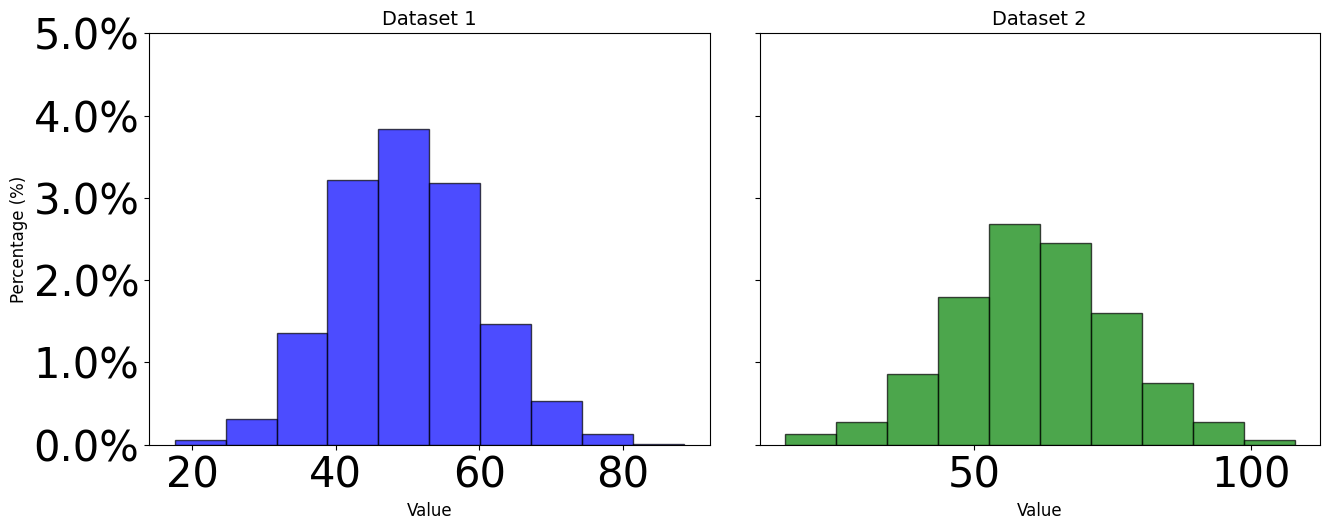

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for two distributions
np.random.seed(42)
data1 = np.random.normal(loc=50, scale=10, size=1000)  # Dataset 1
data2 = np.random.normal(loc=60, scale=15, size=1000)  # Dataset 2

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot histogram for Dataset 1
counts1, bins1, patches1 = axes[0].hist(data1, bins=10, alpha=0.7, color="blue", edgecolor="black", density=True)
axes[0].set_title("Dataset 1", fontsize=14)
axes[0].set_xlabel("Value", fontsize=12)
axes[0].set_ylabel("Percentage (%)", fontsize=12)

# Convert density to percentage
axes[0].set_yticks(axes[0].get_yticks())  # Maintain current ticks
yticks1 = axes[0].get_yticks()
axes[0].set_yticklabels([f"{tick:.1f}%" for tick in yticks1 * 100])

# Plot histogram for Dataset 2
counts2, bins2, patches2 = axes[1].hist(data2, bins=10, alpha=0.7, color="green", edgecolor="black", density=True)
axes[1].set_title("Dataset 2", fontsize=14)
axes[1].set_xlabel("Value", fontsize=12)

# Convert density to percentage
axes[1].set_yticks(axes[1].get_yticks())  # Maintain current ticks
yticks2 = axes[1].get_yticks()
axes[1].set_yticklabels([f"{tick:.1f}%" for tick in yticks2 * 100])

# Adjust layout and display
plt.tight_layout()
plt.show()

